# Neurona Lineal

Una vez visto el **algoritmo del perceptrón**, cabe preguntarnos si podemos utilizar técnicas de optimización matemática sobre este, la respuesta corta es no, porqué la funcion de activación (función de umbral) es no diferenciable, pues esta función solo toma valores de cero o uno.

Para usar las técnicas de optimización debemos modificar un poco la arquitectura que tiene el perceptrón, para ello quitaremos la función de activación, de tal modo que como valor predicho solo quede la combinación lineal de la matriz de caracteristicas y el vector de pesos sinápticos mas un sesgo.

$$\sum_i x_i w_i + b$$

Es decir, la función de activación es una función lineal.

$$φ(\textbf{x}) = \sum_i x_i w_i + b$$

A este algoritmo también se lo conoce por el nombre de "adaptive linear element" (ADALINE) o regla de Widrow Hoft en honor a su creador.

El modelo matemático de la neurona es:

$$\hat{y}=w^T x+b$$

De modo que la salida de la neurona ya no sera de forma discreta, como lo teniamos en el perceptrón, sino que tendremos una salida continua, $y^{(i)} \in \mathbb{R}$; para los elementos de la matriz de caracteristicas se tendrá el mismo conjunto, $x^{(i)} \in \mathbb{R}^m$.

Por lo tanto, dado la naturaleza de esta nueva neurona, lo podremos usar para problemas de regresión. Para este nuevo problema se debe desarrollar un nuevo algoritmo para poder entrenarlo, para ello se usará técnicas de optimización.

# Gradiente descendente en linea

Para resolver este problema de optimización debemos generar el error $e_1 = y - \hat{y}$, y como queremos que se minimice este error, con tal de que los valores predichos esten lo mas cerca posible de los valores reales, podemos utilizar la siguiente función de perdida:

$$e_1 = L(y,\hat{y}) = \frac{1}{2} (y - \hat{y})^2$$

Ahora si podemos buscar el $argmin$ de la función:

$$\frac{∂ L(y,\hat{y}) }{∂ w_i} = - (y - \hat{y}) x_i$$

$$\frac{∂ L(y,\hat{y}) }{∂ b} = - (y - \hat{y})$$

Consiguientemente, podemos vectorizar las derivadas parciales con respecto a los pesos sinápticos, al cual se lo conoce como gradiente:

$$∇_w L(y,\hat{y}) = - (y - \hat{y}) x$$

Donde $x$ es un vector de $m x 1$.


De este modo, podemos llegar a las siguientes ecuaciones para entrenar el algoritmo:

\begin{align}
\hat{y} = w^T x + b \\
w + η (y - \hat{y}) x \rightarrow w \\
b + η (y - \hat{y}) \rightarrow b \\
\end{align}


# Gradiente descendente por lote

Otra función de costo que podemos utilizar es el siguiente:

$$e_2 = \frac{1}{2 p} \sum_{i=1}^p (y^{(i)} - \hat{y}^{(i)})^2$$

donde $y^{(i)}$ representa las salidas deseadas y $\hat{y}^{(i)}= w x^{(i)} + b$ son los valores predichos. Ahora debemos encontrar el gradiente para este nuevo error:

$$\nabla_w e_2 = - \frac{1}{p} \sum_{i=1}^p\left[(y^{(i)} - \hat{y}^{(i)})x^{(i)}\right]$$

$$\frac{\partial}{\partial b} e_2 = \frac{1}{p} \sum_{i=1}^p\left[(y^{(i)} - \hat{y}^{(i)})\right]$$

Como tenemos una suma de vectores podemos llevarla a una forma matricial:

$$\nabla_w e_2 = - \frac{1}{p} (Y - \hat{Y}) X^T $$

$$\frac{\partial}{\partial b} e_2 = - \frac{1}{p} \sum_{i=1}^p(Y - \hat{Y})$$

Donde $Y, \hat{Y}$ son vectores de $1xp$ y $X$ es una matriz de $nxp$.

De este modo podemos definir las siguientes ecuaciones para entrenar con el algoritmo:

\begin{align}
\hat{Y} = w X + b \\
w + \frac{η}{p} (Y - \hat{Y}) X^T \rightarrow w \\
b + \frac{η}{p} \sum_{i=1}^p\left[y^{(i)} - \hat{y}^{(i)}\right] \rightarrow b \\
\end{align}

# Programando la neurona lineal

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
class Neurona_lineal:
  def __init__(self, n_entrada, factor_aprendizaje=0.1):
    self.w = -1 +2 * np.random.rand(n_entrada) # se creara un vector aleatorio entre -1 y 1
    self.b = -1 +2 * np.random.rand()
    self.eta = factor_aprendizaje

  #Creando el método de prediccion
  def predict(self, X):
    y_est = np.dot(self.w, X) + self.b
    return y_est

  #Creando el metodo para entrenar
  def fit(self, X, Y, epochs=100, solver='SGD'):
    p = X.shape[1] #sacamos el indice 1 de X, el número de patrones
    if solver == 'SGD': #SGD=Gradiente descendente en en linea (estocástico)
      for _ in range(epochs):
        for i in range(p):
          y_est = self.predict(X[:, i])
          #las actualizaciones
          self.w += self.eta * (Y[:,i] - y_est)*X[:,i]
          self.b += self.eta * (Y[:,i] - y_est)
    elif solver == 'BGD': #BGD=Gradiente descendente por lote (Batch)
      for _ in range(epochs):
        Y_est = self.predict(X)
        #las actualizaciones
        self.w += (self.eta/p) * np.dot ((Y-Y_est), X.T).ravel()
        self.b += (self.eta/p) *np.sum(Y-Y_est)
    else: #metodo directo
      X_hat = np.concatenate((np.ones(1,p), X), axis = 0) #concatenamos una fila de 1
      w_hat = np.dot(Y.reshape(1,-1), np.linalg.pinv(X_hat))
      #actualizaciones
      self.w = w_hat[0, 1:]
      self.b = w_hat[0,0]

In [30]:
#Ahora podemos instanciar la clase y usar sus metodos
neurona = Neurona_lineal(1)
neurona.predict(x)
neurona.fit(x,y)

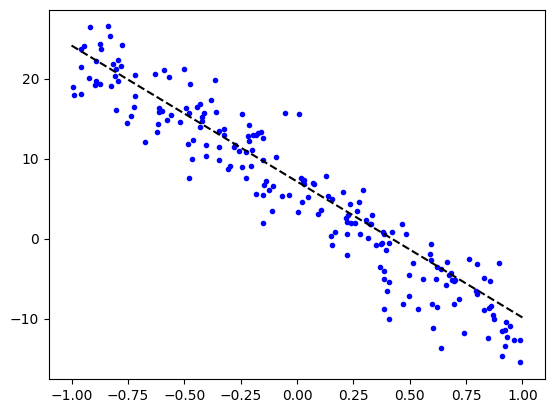

In [31]:
p=200
x = -1 +2 * np.random.rand(p).reshape(1,-1)
y = -18 *x + 6 +3.5 * np.random.randn(p)
plt.plot(x,y, '.b')
xn = np.array([[-1,1]])
plt.plot(xn.ravel(), neurona.predict(xn), '--k')